## 1. ИНН и названия ВУЗов 
Реестр организаций, осуществляющих образовательную деятельность по имеющим государственную аккредитацию образовательным программам http://obrnadzor.gov.ru/ru/opendata/7701537808-RAOO/

In [1]:
import xml.etree.ElementTree as et 
import pandas as pd
import pickle

In [2]:
xml_file = '..\\data\external\\obrnadzorgovru-data-20201119-structure-20160713.xml'

In [3]:
tree = et.parse(xml_file)
root = tree.getroot()

In [4]:
print('Всего организаций', len(root[0]))

Всего организаций 91576


## 1.1. Общие данные
- StatusName - Текущий статус свидетельства
- TypeName - Вид свидетельства
- RegionName - Субъект РФ
- RegionCode - Код Субъекта РФ

In [5]:
rows = []
for i in root.findall("./Certificates/Certificate"):
    status_name = getattr(i.find('StatusName'), 'text', None)
    type_name = getattr(i.find('TypeName'), 'text', None)
    region_name = getattr(i.find('RegionName'), 'text', None)
    region_code = getattr(i.find('RegionCode'), 'text', None)
    
    rows.append({
        'status_name': status_name, 
        'cert_type': type_name, 
        'region_name': region_name, 
        'region_code': region_code
    })

In [6]:
df_cols = ['status_name', 'cert_type', 'region_name', 'region_code']
out_df_certificate = pd.DataFrame(rows, columns = df_cols)

In [7]:
out_df_certificate.head()

,status_name,cert_type,region_name,region_code
0,Недействующее,Не определен,Тверская область,69
1,Действующее,Не определен,Свердловская область,66
2,Действующее,Не определен,Нижегородская область,52
3,Недействующее,Не определен,Иркутская область,38
4,Недействующее,Постоянное,г. Москва,77


## 1.2. Данные из раздела ActualEducationOrganization

- FullName - Полное наименование
- IsBranch - Является филиалом (1 -да, 0 - нет)
- PostAddress - Юридический адрес организации
- OGRN - ОГРН
- INN - ИНН
- FormName - Организационно правовая форма

In [8]:
rows = []
for i in root.findall("./Certificates/Certificate/ActualEducationOrganization"):
    full_name = getattr(i.find('FullName'), 'text', None)
    is_branch = getattr(i.find('IsBranch'), 'text', None)
    post_address = getattr(i.find('PostAddress'), 'text', None)
    ogrn = getattr(i.find('OGRN'), 'text', None)
    inn = getattr(i.find('INN'), 'text', None)
    form_name = getattr(i.find('FormName'), 'text', None)
    
    rows.append({
        'full_name': full_name, 
        'is_branch': is_branch,
        'post_address': post_address,
        'ogrn': ogrn,
        'inn': inn,
        'form_name': form_name
    })

In [9]:
df_cols = ['full_name', 
           'is_branch', 
           'post_address', 
           'ogrn', 'inn', 
           'form_name']
out_df_actual_education_organization = pd.DataFrame(rows, columns = df_cols)

In [10]:
out_df_actual_education_organization.head()

,full_name,is_branch,post_address,ogrn,inn,form_name
0,Муниципальное бюджетное общеобразовательное уч...,None,"ул. Школьная, дом 18, с. Кемцы, Бологовский ра...",1026901606610,6907006968,None
1,Муниципальное казенное образовательное учрежде...,None,"623506, Богдановичский район, с.Каменноозерско...",1026600707000,6605006658,None
2,Муниципальное бюджетное общеобразовательное уч...,0,"607047. Нижегородская область, город Выкса, се...",1025201638329,5247014774,None
3,Муниципальное казённое общеобразовательное учр...,0,"666820 Иркутская область, Мамско-Чуйский район...",1023802648902,3802008384,None
4,Образовательное частное учреждение высшего обр...,0,"127299, г. Москва, ул. Космонавта Волкова, д. 20",1027700364262,7720006383,Частные учреждения


## 1.3. Объединим

In [11]:
df = pd.concat((out_df_certificate, out_df_actual_education_organization), axis = 1)

In [12]:
df.head()

,status_name,cert_type,region_name,region_code,full_name,is_branch,post_address,ogrn,inn,form_name
0,Недействующее,Не определен,Тверская область,69,Муниципальное бюджетное общеобразовательное уч...,None,"ул. Школьная, дом 18, с. Кемцы, Бологовский ра...",1026901606610,6907006968,None
1,Действующее,Не определен,Свердловская область,66,Муниципальное казенное образовательное учрежде...,None,"623506, Богдановичский район, с.Каменноозерско...",1026600707000,6605006658,None
2,Действующее,Не определен,Нижегородская область,52,Муниципальное бюджетное общеобразовательное уч...,0,"607047. Нижегородская область, город Выкса, се...",1025201638329,5247014774,None
3,Недействующее,Не определен,Иркутская область,38,Муниципальное казённое общеобразовательное учр...,0,"666820 Иркутская область, Мамско-Чуйский район...",1023802648902,3802008384,None
4,Недействующее,Постоянное,г. Москва,77,Образовательное частное учреждение высшего обр...,0,"127299, г. Москва, ул. Космонавта Волкова, д. 20",1027700364262,7720006383,Частные учреждения


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91576 entries, 0 to 91575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status_name   91576 non-null  object
 1   cert_type     91576 non-null  object
 2   region_name   90819 non-null  object
 3   region_code   90819 non-null  object
 4   full_name     91552 non-null  object
 5   is_branch     15765 non-null  object
 6   post_address  91241 non-null  object
 7   ogrn          89060 non-null  object
 8   inn           89825 non-null  object
 9   form_name     11947 non-null  object
dtypes: object(10)
memory usage: 7.0+ MB


## 1.4. Выберем только "status_name" == "Действующее" и "full_name" содержит "высшего"

In [14]:
df['status_name'].unique()

array(['Недействующее', 'Действующее', 'Прекращено', 'Лишен аккредитации',
       'Приостановлено'], dtype=object)

In [15]:
acting = df["status_name"] == "Действующее"
higher_education = df["full_name"].str.contains('высшего')

In [16]:
df_vuz = df[acting & higher_education].drop(['status_name'], axis=1)

In [17]:
df_vuz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 12 to 91271
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cert_type     800 non-null    object
 1   region_name   790 non-null    object
 2   region_code   790 non-null    object
 3   full_name     800 non-null    object
 4   is_branch     781 non-null    object
 5   post_address  800 non-null    object
 6   ogrn          800 non-null    object
 7   inn           800 non-null    object
 8   form_name     759 non-null    object
dtypes: object(9)
memory usage: 62.5+ KB


In [18]:
df_vuz.head()

,cert_type,region_name,region_code,full_name,is_branch,post_address,ogrn,inn,form_name
12,Постоянное,Тюменская область,72,федеральное государственное казенное военное о...,0,"625001, г. Тюмень, улица Льва Толстого, д. 1",5137746045070,7203255254,федеральное государственное казенное военное о...
1109,Постоянное,Вологодская область,35,федеральное государственное бюджетное образова...,0,"162600, Вологодская область, г. Череповец, про...",1023501255348,3528051834,Бюджетные учреждения
2891,Постоянное,г. Москва,77,федеральное государственное бюджетное образова...,0,"117997, г. Москва, Стремянный переулок, д. 36",1037700012008,7705043493,федеральное государственное бюджетное учреждение
3032,Постоянное,"образовательные учреждения, находящиеся за пре...",90,Государственное образовательное учреждение выс...,0,"Республика Армения, г. Ереван, ул. Овсепа Эмин...",264.211.08329,00053474,Бюджетные учреждения
3824,Постоянное,Воронежская область,36,Воронежский институт высоких технологий - авто...,0,"394043, г. Воронеж, ул. Ленина, д. 73а",1033600006439,3662006761,Автономные некоммерческие организации


In [19]:
df_vuz.describe()

,cert_type,region_name,region_code,full_name,is_branch,post_address,ogrn,inn,form_name
count,800,790,790,800,781,800,800,800,759
unique,2,81,81,703,2,700,703,703,31
top,Постоянное,г. Москва,77,федеральное государственное автономное образов...,0,"101000, г. Москва, ул. Мясницкая, д. 20",1027739630401,7714030726,Бюджетные учреждения
freq,799,162,162,3,774,3,3,3,375


In [20]:
print('Всего ВУЗов', len(df_vuz))

Всего ВУЗов 800


http://273-фз.рф/zakonodatelstvo/federalnyy-zakon-ot-29-dekabrya-2012-g-no-273-fz-ob-obrazovanii-v-rf
- Наименование образовательной организации должно содержать указание на ее организационно-правовую форму и тип образовательной организации.

In [21]:
df_vuz['form_name'].unique()

array(['федеральное государственное казенное военное образовательное учреждение',
       'Бюджетные учреждения',
       'федеральное государственное бюджетное учреждение',
       'Автономные некоммерческие организации', 'Казенные учреждения',
       None,
       'федеральное государственное автономное образовательное учреждение',
       'автономная некоммерческая образовательная организация',
       'Частные учреждения',
       'государственное бюджетное образовательное учреждение',
       'государственное образовательное учреждение',
       'государственное учреждение',
       'государственное бюджетное учреждение',
       'федеральное государственное образовательное бюджетное учреждение',
       'федеральное государственное автономное учреждение',
       'федеральное государственное казенное учреждение',
       'некоммерческая организация', 'частное учреждение',
       'автономная некоммерческая организация',
       'частное образовательное учреждение',
       'государственное автоно

In [22]:
vuz_type_set = set()
for name in df_vuz['full_name']:
    name = name.lower()
    name = name.replace('"','«')
    vuz_type = name.split('«')
    vuz_type = vuz_type[0].split('высшего образования')
    # print(vuz_type[0])
    vuz_type = vuz_type[0].split(' ')
    for word in vuz_type:
        vuz_type_set.add(word)

In [23]:
for word in ['-', '(славянский)', '', 'астраханской', 'воронежский', 'высшего', 'кыргызско-российский', 'красного',
            'области', 'областное', 'образования', 'образовательная', 'образовательное', 'организация', 'ордена',
             'профессионального', 'профсоюзов', 'российско-армянский', 'санкт-петербургское', 'славянский', 'среднего',
             'тамбовское', 'трудового', '–', 'знамени', 'высоких']:
    vuz_type_set.remove(word)

In [24]:
vuz_type_set

{'автономная',
 'автономное',
 'аккредитованное',
 'бюджетное',
 'военное',
 'государственное',
 'духовная',
 'инклюзивного',
 'институт',
 'казенное',
 'культуры',
 'межгосударственное',
 'муниципальное',
 'негосударственная',
 'негосударственное',
 'некоммерческая',
 'некоммерческое',
 'религиозная',
 'технологий',
 'университет',
 'учреждение',
 'федеральное',
 'частное'}

In [25]:
avtonomnaya = ['автономная',  'автономное']
akkreditovannoye = ['аккредитованное']
byudzhetnoye = ['бюджетное']
voyennoye = ['военное']
gosudarstvennoye = ['государственное']
religioznaya = ['духовная', 'религиозная']
inclusive = ['инклюзивного']
institute = ['институт']
kazennoye = ['казенное']
kultury = ['культуры']
mezhgosudarstvennoye = ['межгосударственное']
munitsipalnoye = ['муниципальное']
negosudarstvennaya = ['негосударственная', 'негосударственное']
nekommercheskaya = ['некоммерческая', 'некоммерческое']
technologies = ['технологий']
universitet = ['университет']
uchrezhdeniye = ['учреждение']
federalnoye = ['федеральное']
chastnoye = ['частное']

In [26]:
categories = [avtonomnaya, akkreditovannoye,
              byudzhetnoye, voyennoye,
              gosudarstvennoye, religioznaya,
              inclusive, institute,
              kazennoye, kultury,
              mezhgosudarstvennoye, munitsipalnoye,
              negosudarstvennaya, nekommercheskaya,
              technologies, universitet,
              uchrezhdeniye, federalnoye,
              chastnoye
             ]

In [27]:
categories_names = ['is_avtonomnaya', 'is_akkreditovannoye',
              'is_byudzhetnoye', 'is_voyennoye',
              'is_gosudarstvennoye', 'is_religioznaya',
              'is_inclusive', 'is_institute',
              'is_kazennoye', 'is_kultury',
              'is_mezhgosudarstvennoye', 'is_munitsipalnoye',
              'is_negosudarstvennaya', 'is_nekommercheskaya',
              'is_technologies', 'is_universitet',
              'is_uchrezhdeniye', 'is_federalnoye',
              'is_chastnoye'
             ]

In [28]:
for cats, cats_name in zip(categories, categories_names):
    mask = df_vuz["full_name"].str.contains(cats[0])
    if len(cats)>1:
        mask = mask + df_vuz["full_name"].str.contains(cats[1])
    df_vuz[cats_name] = mask

C:\Users\bobkova-ao\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [30]:
df_vuz[categories_names].head()

,is_avtonomnaya,is_akkreditovannoye,is_byudzhetnoye,is_voyennoye,is_gosudarstvennoye,is_religioznaya,is_inclusive,is_institute,is_kazennoye,is_kultury,is_mezhgosudarstvennoye,is_munitsipalnoye,is_negosudarstvennaya,is_nekommercheskaya,is_technologies,is_universitet,is_uchrezhdeniye,is_federalnoye,is_chastnoye
12,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False
1109,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True,False
2891,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True,False
3032,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3824,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False


In [46]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [47]:
X = df_vuz[categories_names]

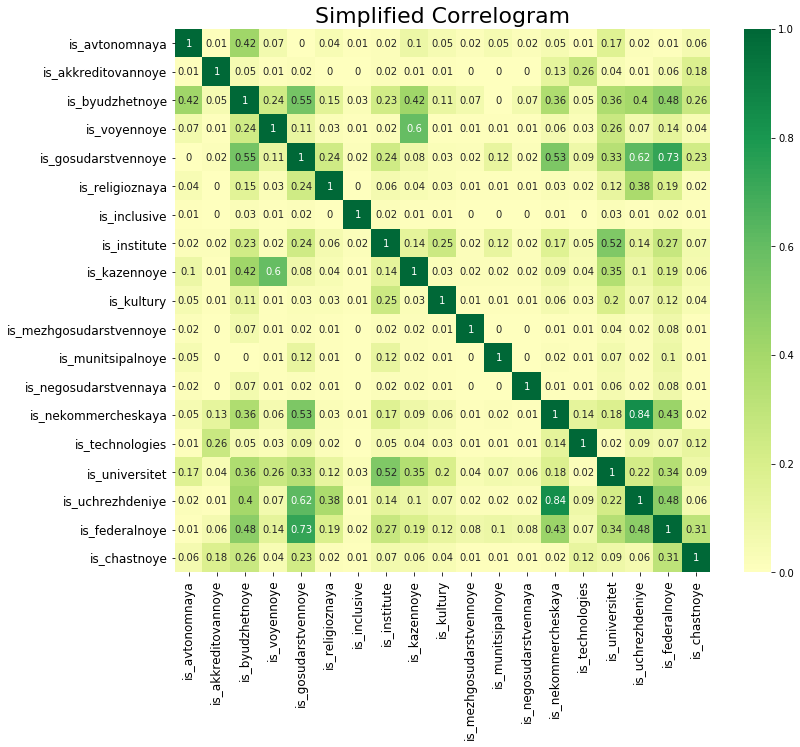

In [49]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(X.corr().round(2)), xticklabels=X.corr().columns, yticklabels=X.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Simplified Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('correlogram.png', dpi=100)
plt.show()

In [41]:
clustering = AgglomerativeClustering().fit(X)

In [42]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix

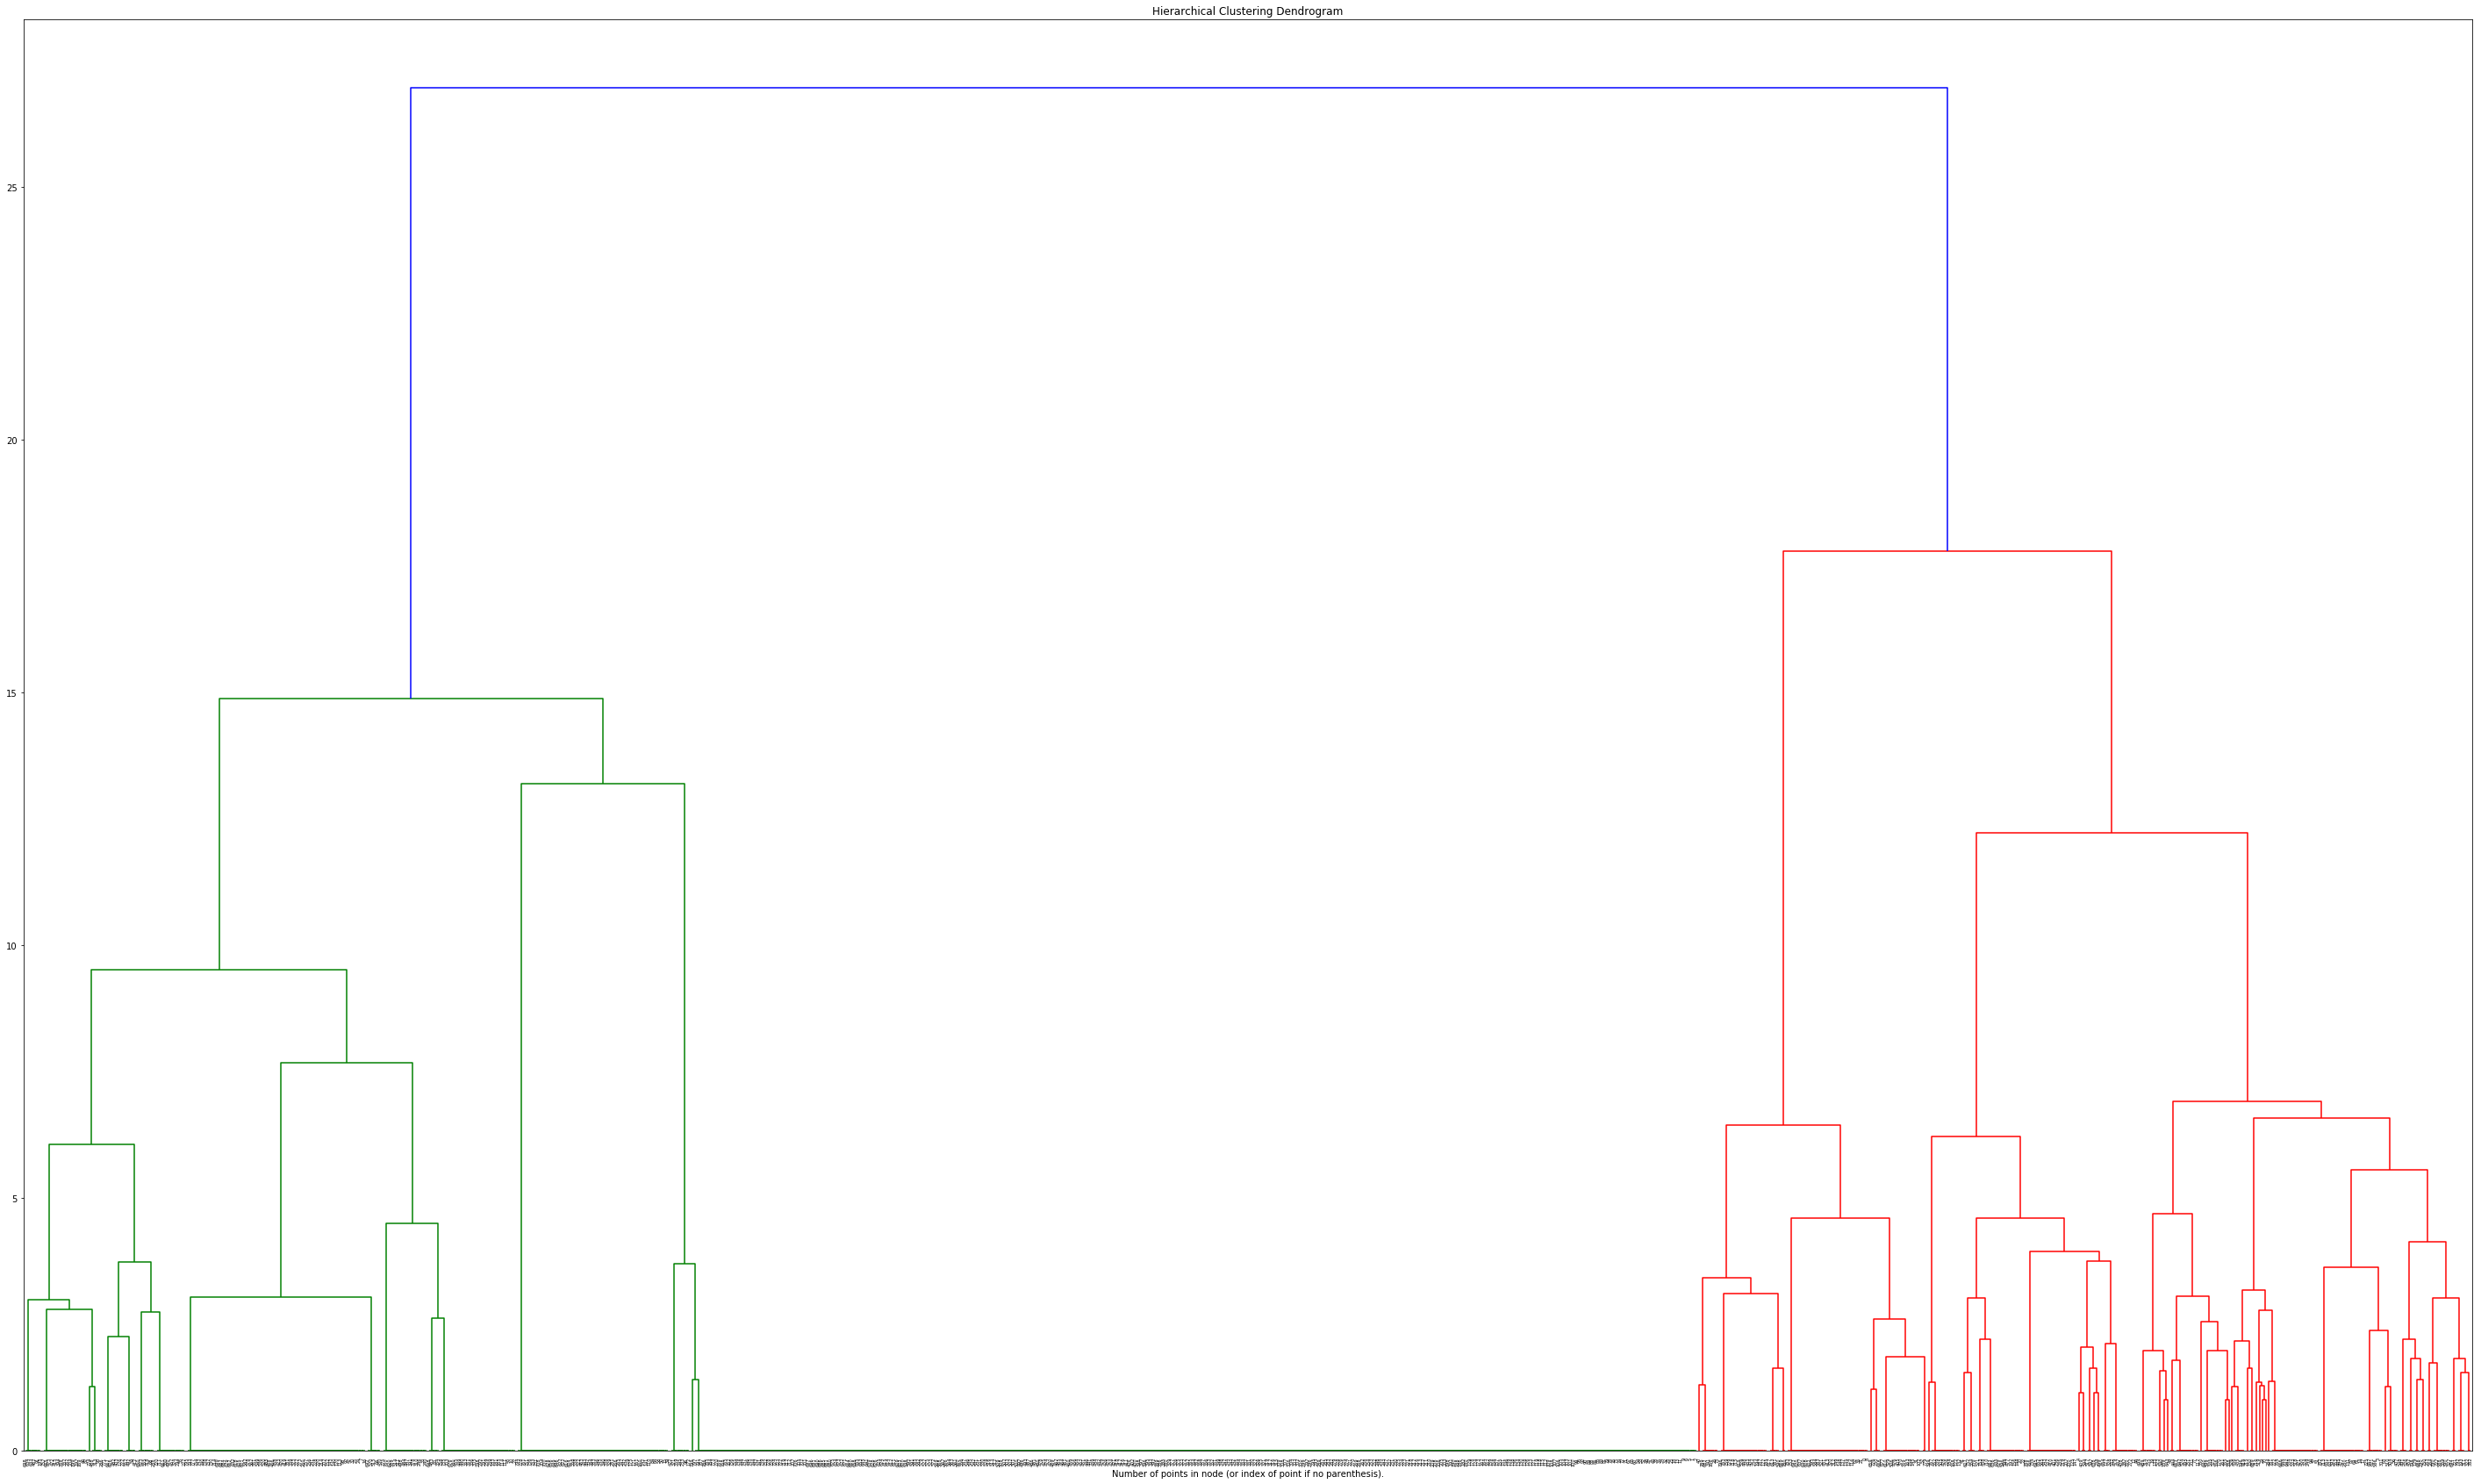

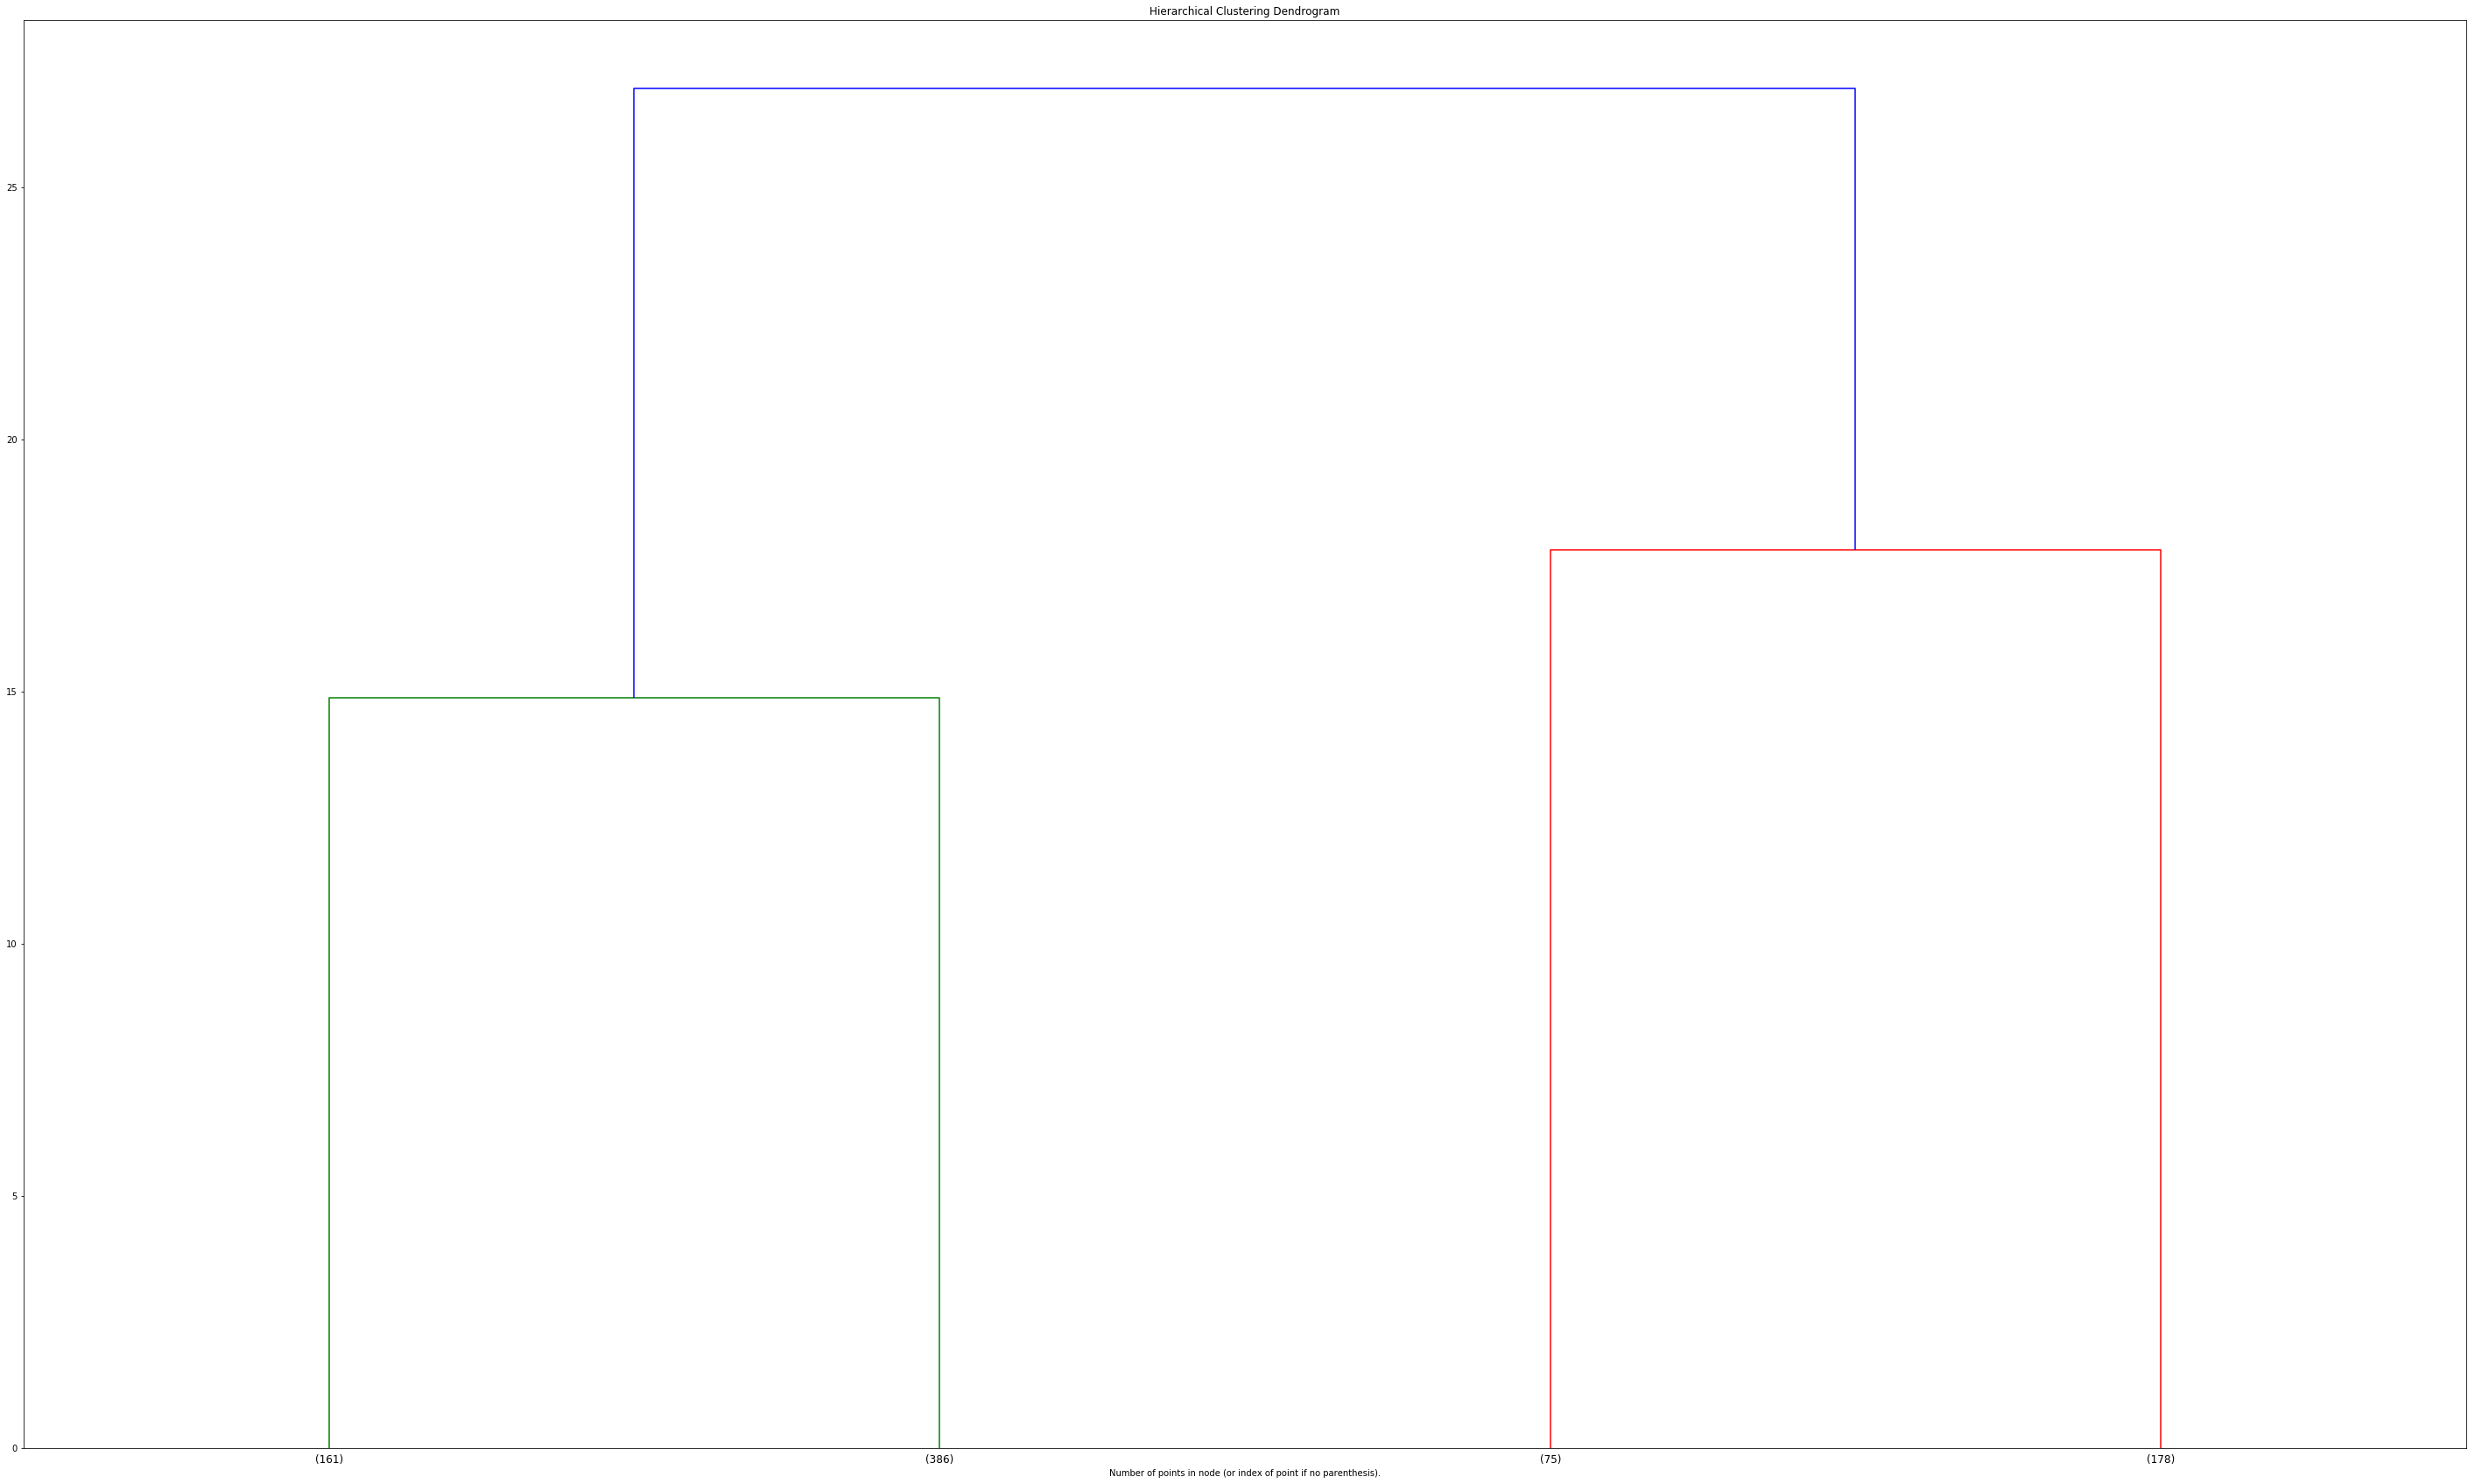

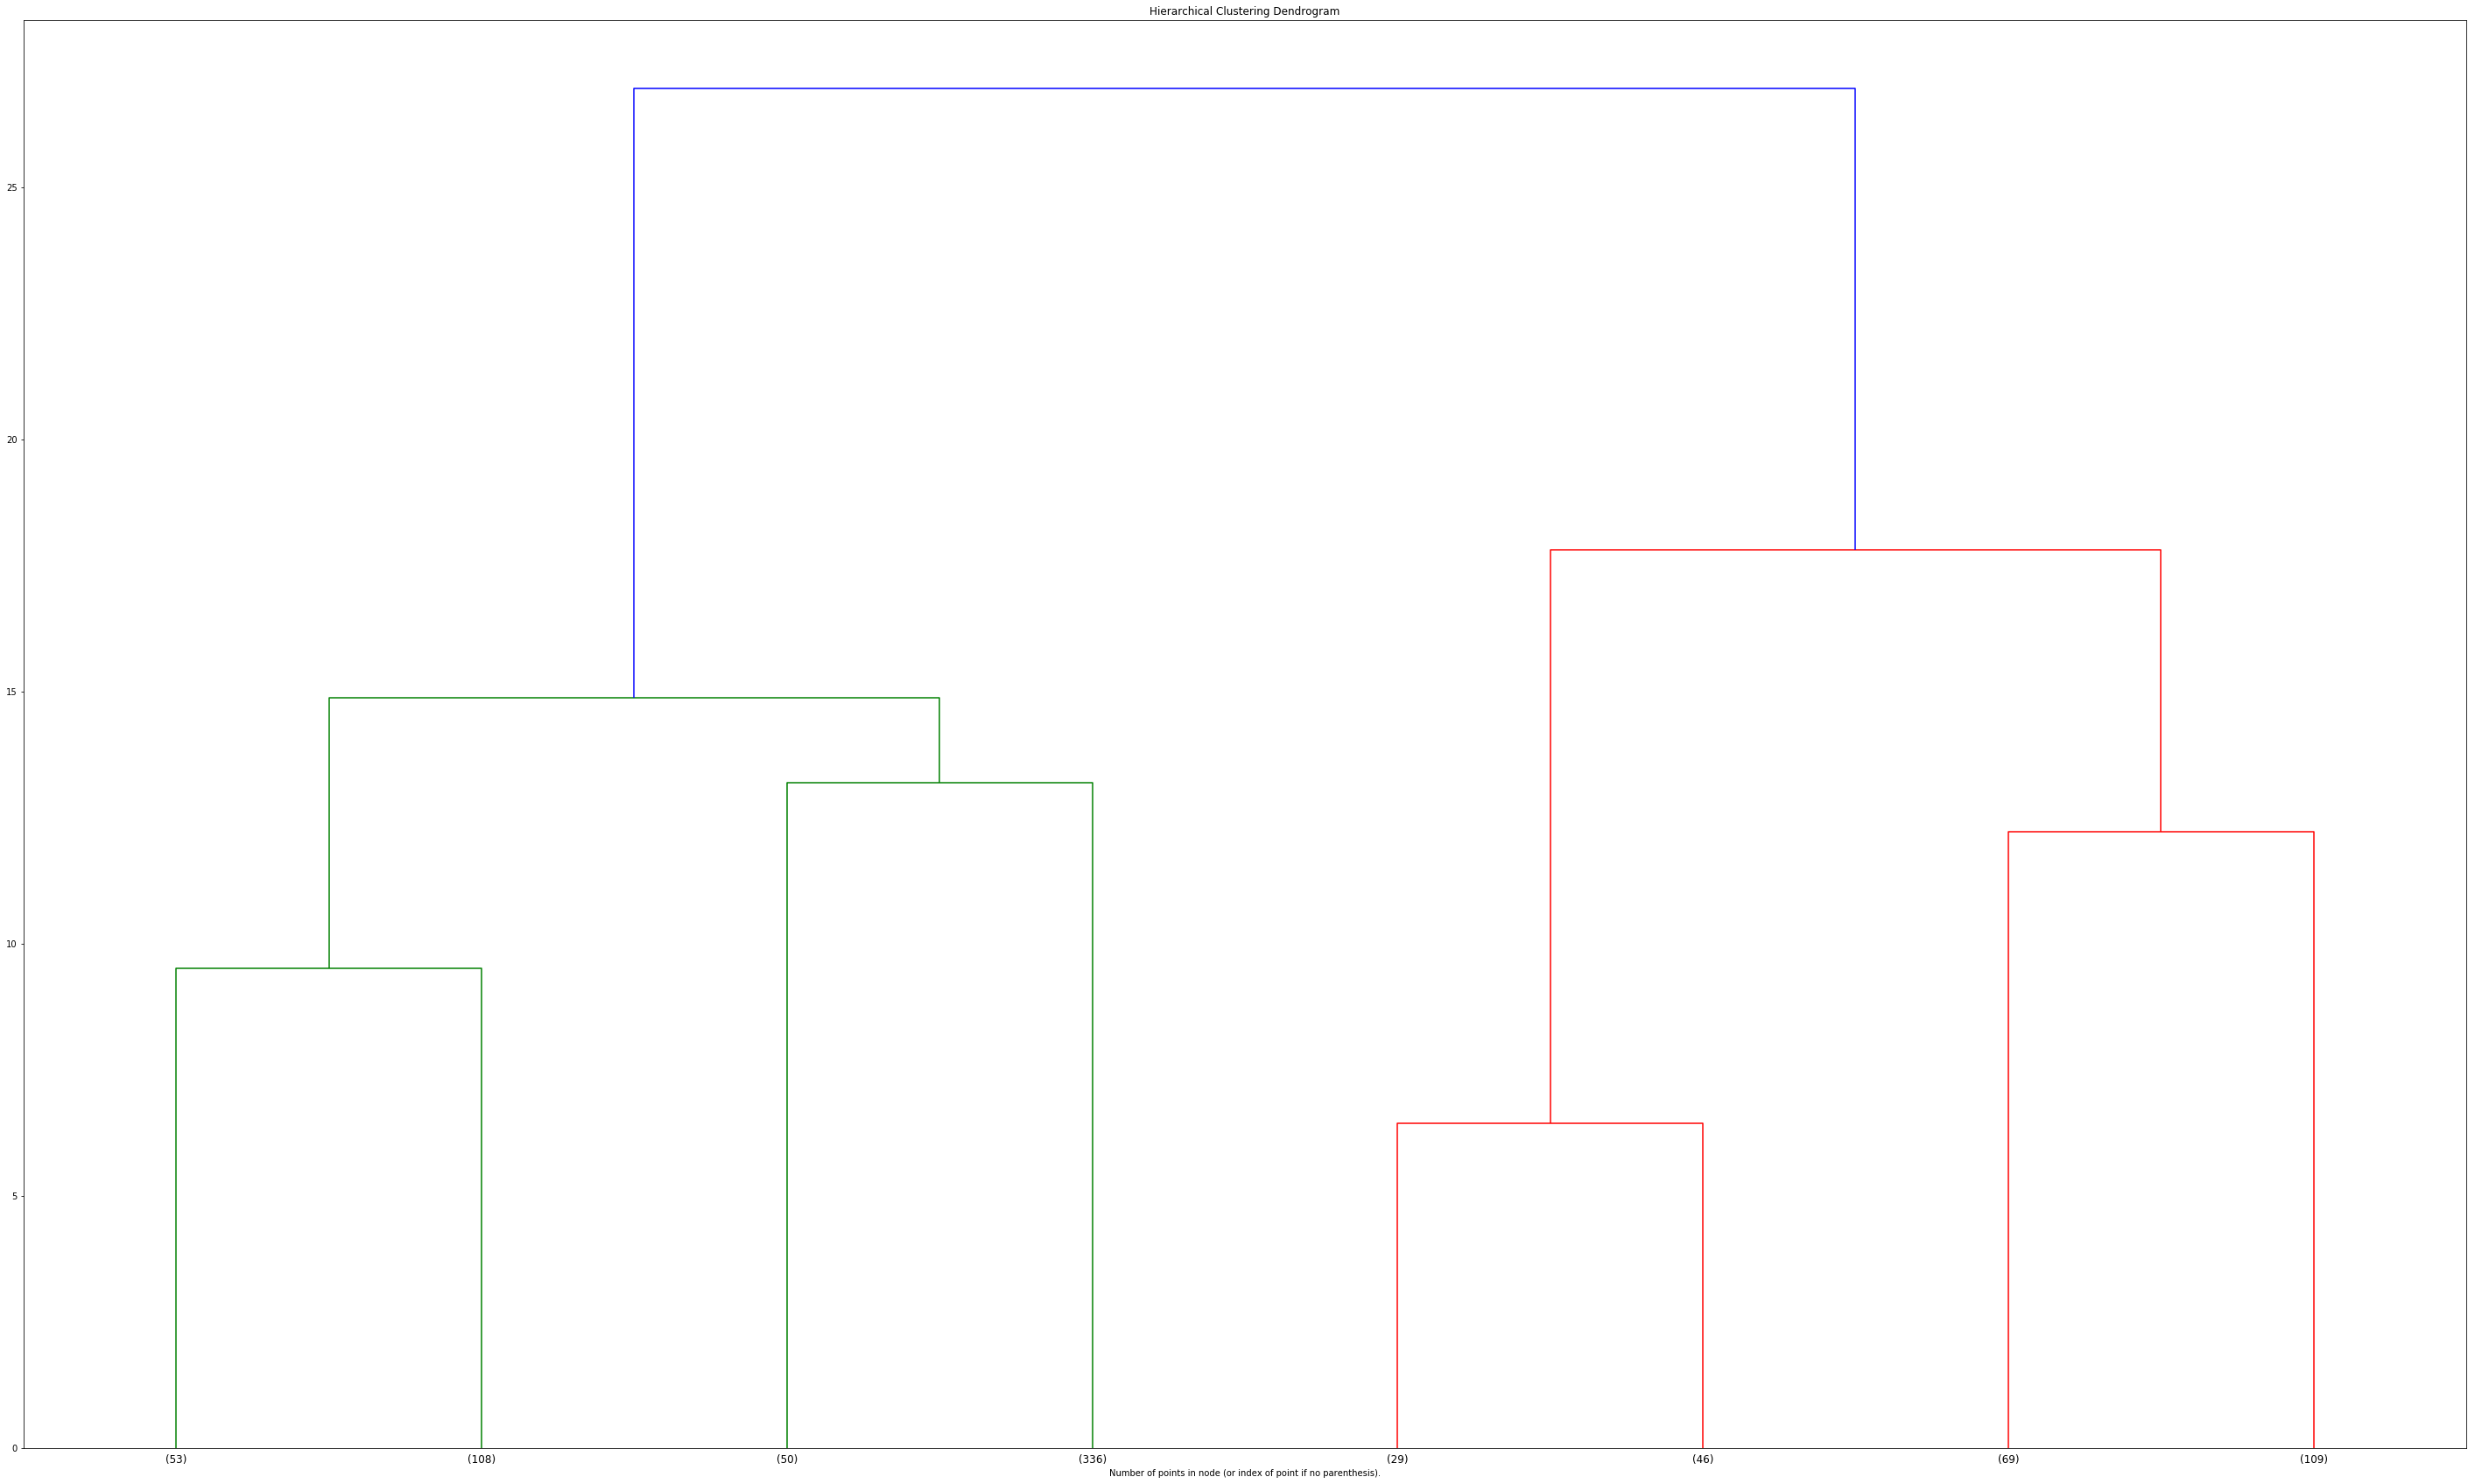

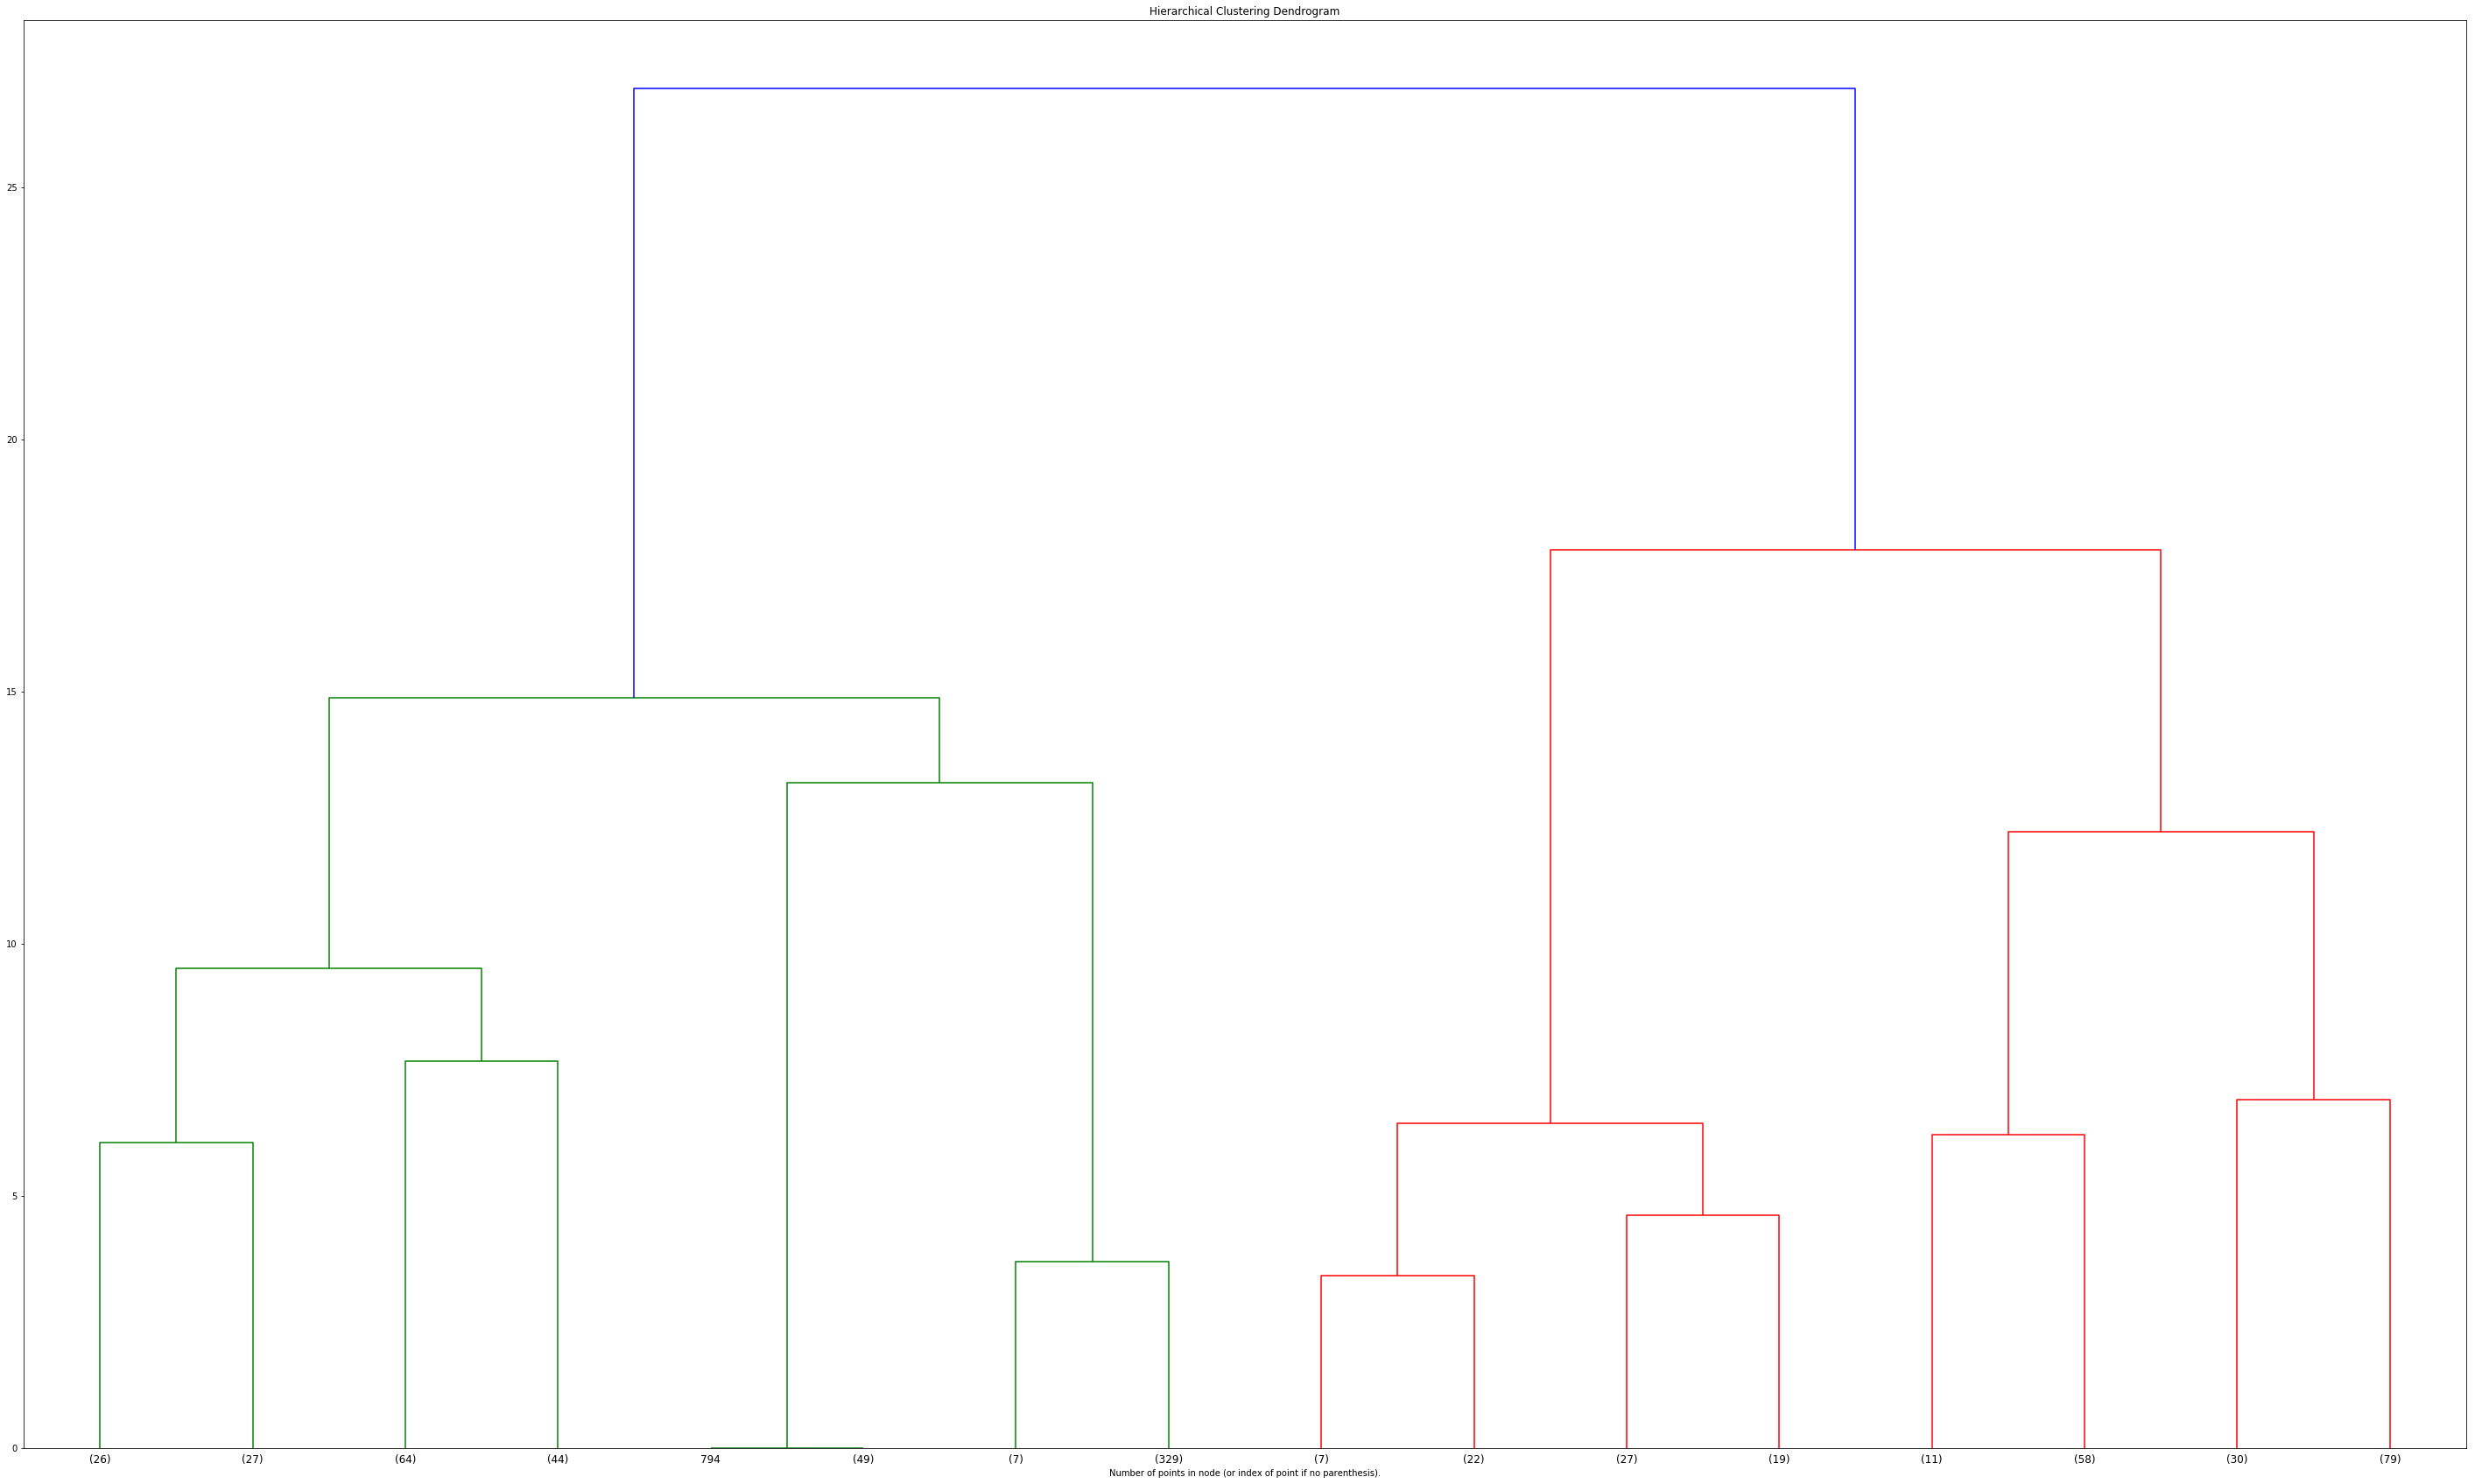

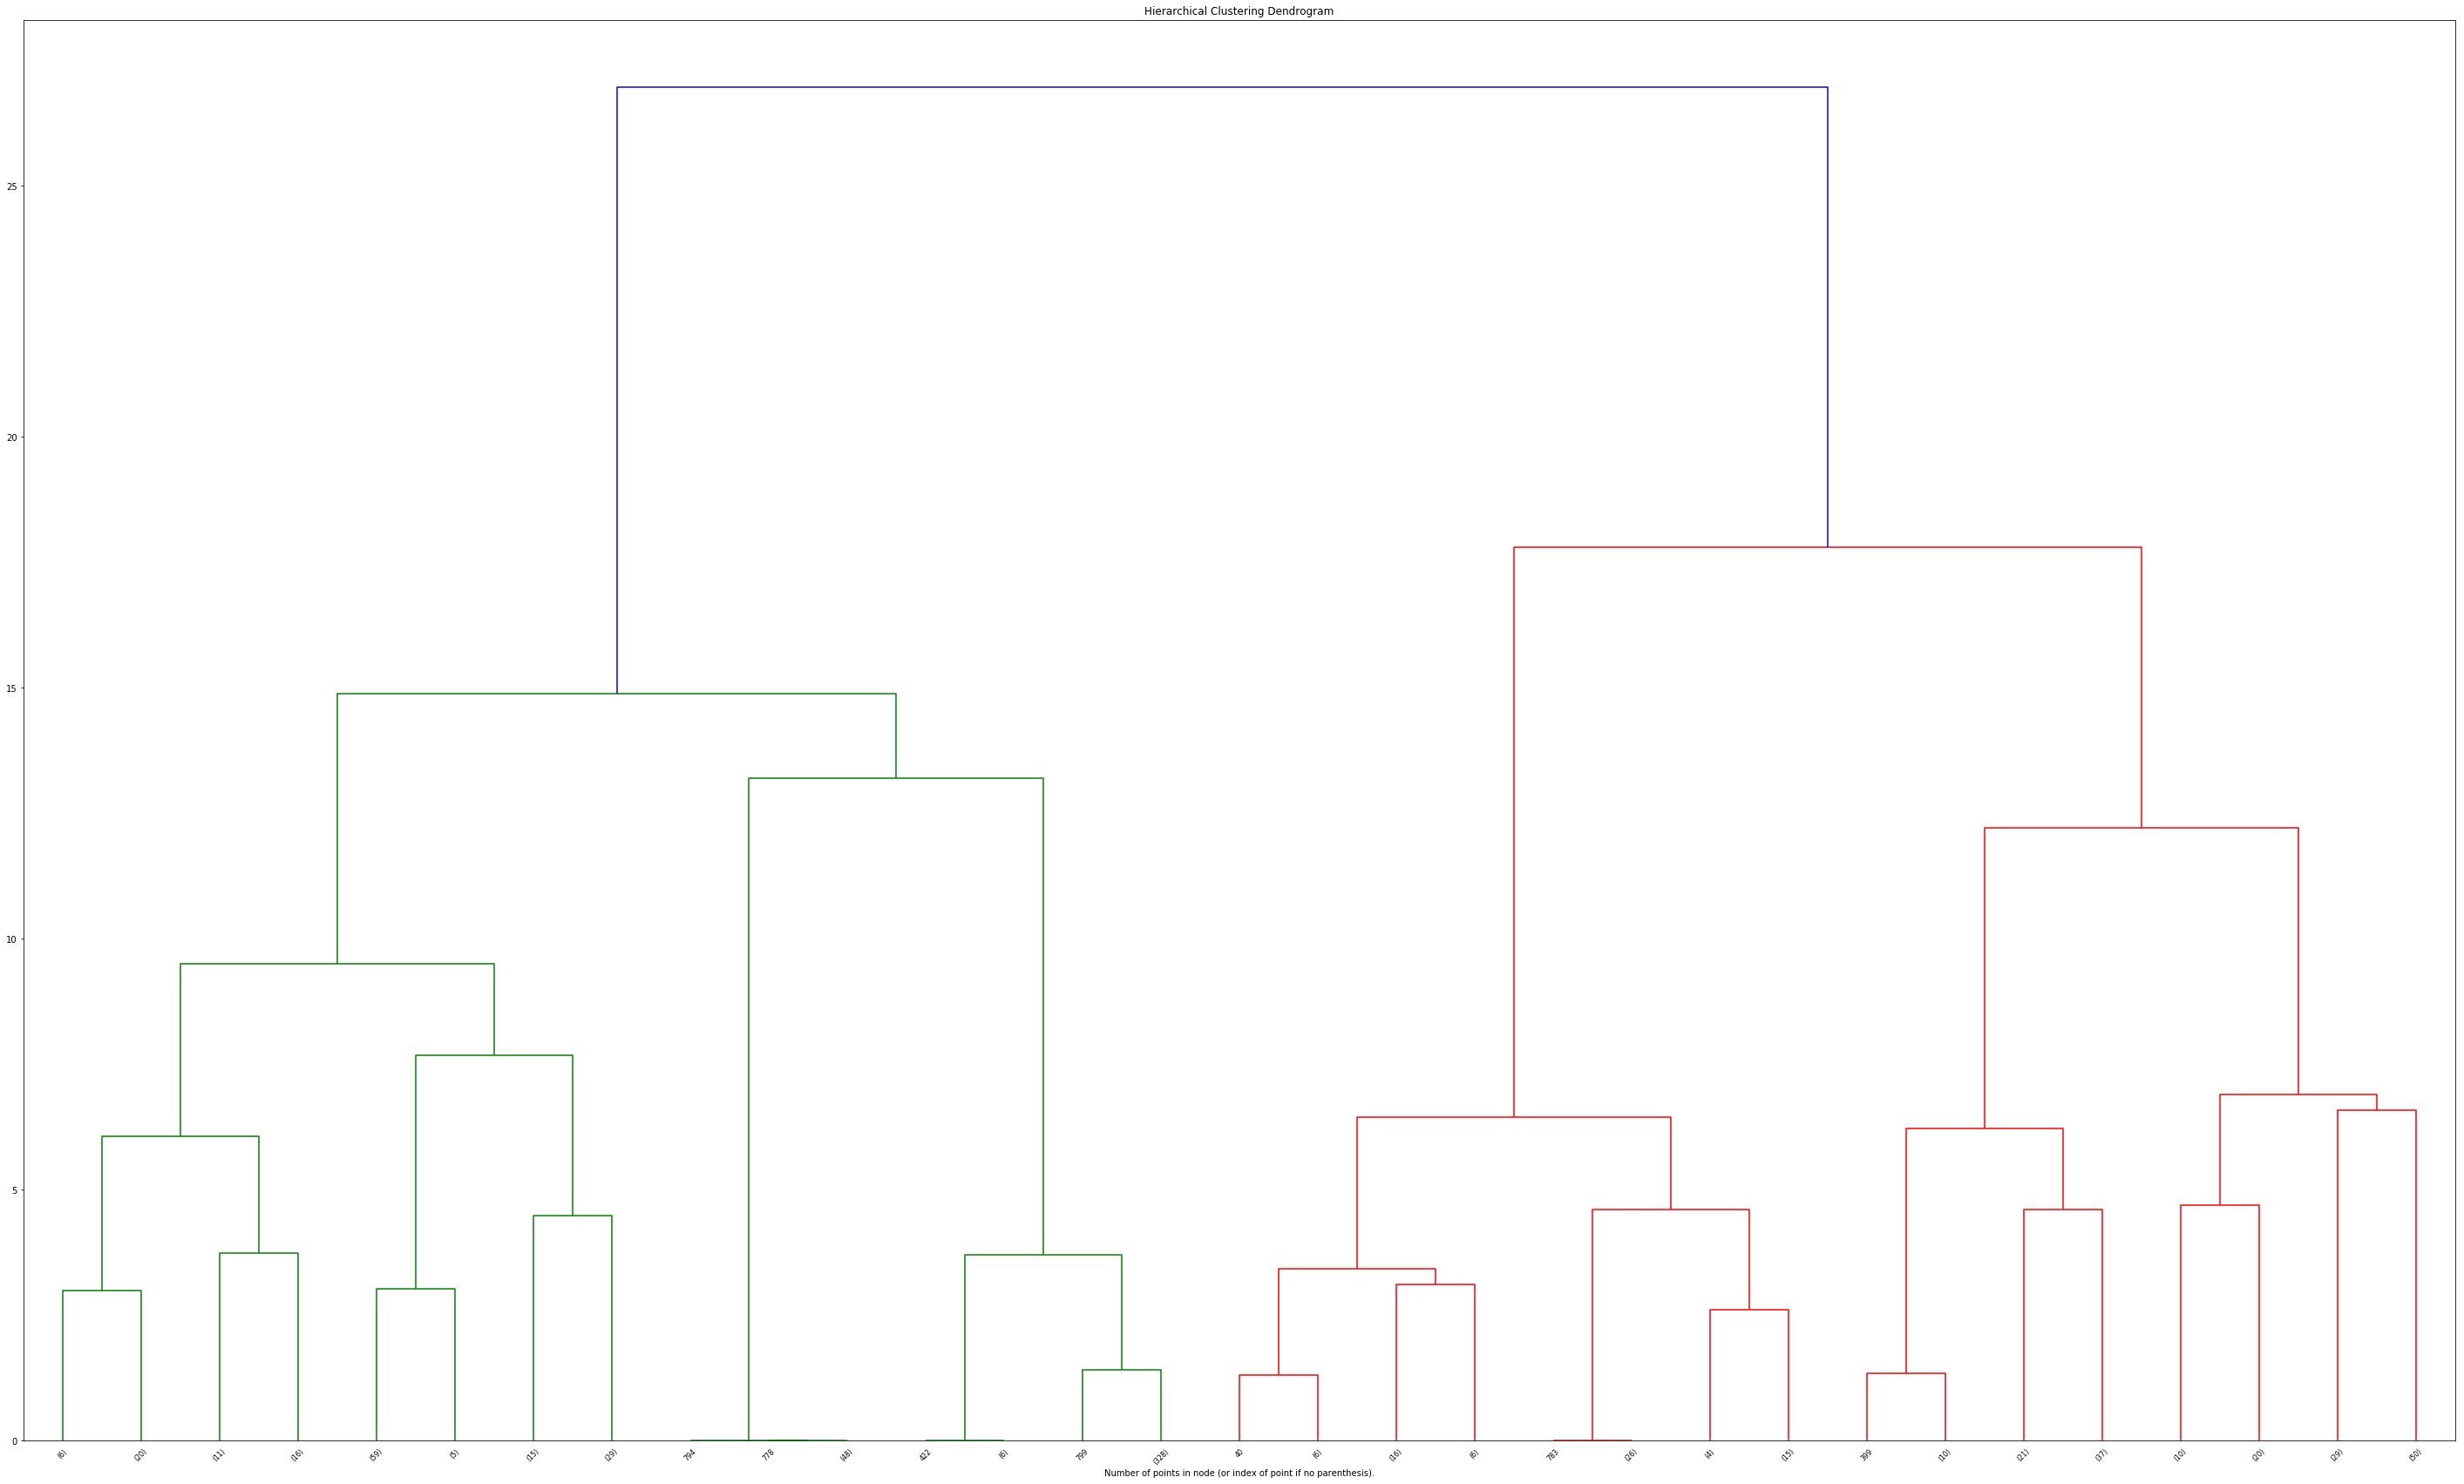

In [43]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

for i in range(5):
    
    plt.figure(figsize=(50,30))
    plt.title('Hierarchical Clustering Dendrogram')
    # plot the top three levels of the dendrogram
    u = plot_dendrogram(model, truncate_mode='level', p=i)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.savefig('dendrogram' + str(i) + '.png', dpi=100)
    plt.show()